<a href="https://colab.research.google.com/github/dansjack/ad-470-group2/blob/dj-3/coyote_or_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 1 - Coyote or Dog?   
    team members: Abenezer Taddesse, Daniel Jack, Jeffrey Wicorek 

## Data Section
    To begin, We downloaded sample data from the provided datasets on canvas. We used a subset of the dog dataset so we had the same number of dog and coyote photots. We ended up with 1848 images of both dogs and coyotes. Because we felt like dogs and coyotes are similar, we chose to use 80 percent of the dataset for training the model, and 20 percent of the dataset for validating the model.

    

Step 1: extract datasets from zip file into the tmp folder.

In [81]:
import os
import zipfile

!wget https://github.com/dansjack/ad-470-group2/raw/main/coyote_dog.zip

local_zip = './coyote_dog.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()

/bin/bash: wget: command not found


Step 2: Set up variables for the base, validation, and train directories, as well as their subdirectories.

In [82]:
base_dir = './tmp/coyote_dog'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training coyotes pictures
train_coyotes_dir = os.path.join(train_dir, 'coyotes')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation coyotes pictures
validation_coyotes_dir = os.path.join(validation_dir, 'coyotes')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Data Exploration
    For data exploration, we printed out the first 10 file names in each dataset contained in both the train directory and validation directory to verify the files were in the right place. Then we counted the total number of files in each directory to ensure they were all accounted for. Lastly, we displayed a 4x4 grid of random samples of both dog and coyote photos.
    


Step 3: Prints a list of the first 10 file names in each dataset inside the train directory

In [83]:
#List of training coyote filenames
train_coyotes_fnames = os.listdir(train_coyotes_dir)

print(train_coyotes_fnames[:10])

#List of training dog filenames
train_dogs_fnames = os.listdir(train_dogs_dir)

train_dogs_fnames.sort()
print(train_dogs_fnames[:10])

['image478.jpg', 'image336.jpg', 'image322.jpg', 'image1018.jpg', 'image1024.jpg', 'image493.jpg', 'image134.jpg', 'image646.jpg', 'image861.jpg', 'image849.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Step 4: Prints a list of the first 10 file names in each dataset inside the validation directory

In [84]:
#List of validation coyote filenames
validation_coyotes_fnames = os.listdir(validation_coyotes_dir)

print(validation_coyotes_fnames[:10])

#List of training dog filenames
validation_dogs_fnames = os.listdir(validation_dogs_dir)

validation_dogs_fnames.sort()
print(validation_dogs_fnames[:10])

['image1583.jpg', 'image1597.jpg', 'image1391.jpg', 'image1385.jpg', 'image1408.jpg', 'image1434.jpg', 'image1352.jpg', 'image1420.jpg', 'image1637.jpg', 'image1421.jpg']
['dog.740.jpg', 'dog.741.jpg', 'dog.742.jpg', 'dog.743.jpg', 'dog.744.jpg', 'dog.745.jpg', 'dog.746.jpg', 'dog.747.jpg', 'dog.748.jpg', 'dog.749.jpg']


Step 5: Count the total number of files in each dataset inside both the validation and train directory

In [85]:
print('total training coyotes images:', len(os.listdir(train_coyotes_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total validation coyotes images:', len(os.listdir(validation_coyotes_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))

total training coyotes images: 740
total training dogs images: 740
total validation coyotes images: 184
total validation dogs images: 184


Step 6: set up the grid size for displaying images from both datasets

In [86]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Step 7: Display a batch of 8 random coyote photos and 8 random dog photos. You can rerun this cell and get a different display each time.

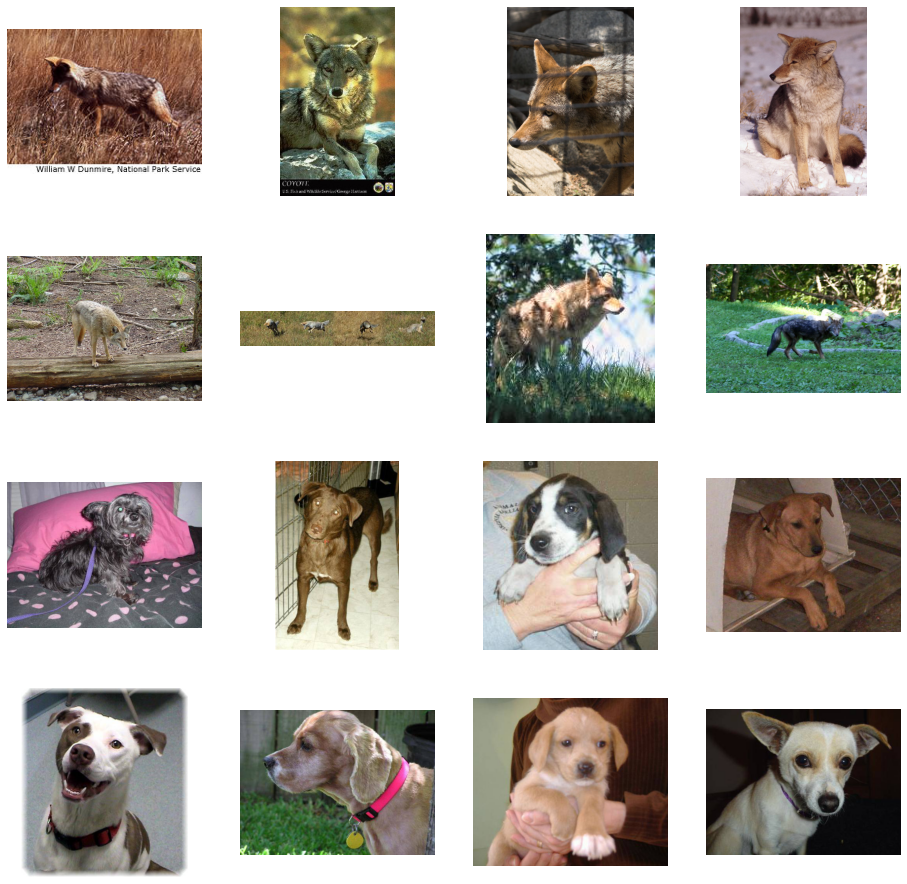

In [87]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_coyotes_pix = [os.path.join(train_coyotes_dir, fname) 
                for fname in train_coyotes_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_coyotes_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Create Convolutional Neural Network (CNN) Model
We use a CNN consisting of the following 6 layers:
1. **Input** - used to shape our input maps

2. **Convolutional + ReLU** - used to create feature maps by taking in the input maps and applying a convolutional filter. Next, the Rectified Linear Unit (ReLU) function is applied which filters out any negative values from the feature maps. Jason Brownlee of Machine Learning Mastery writes, It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance." (Brownlee)

3. **Max Pooling** - used to save processessing time by reducing the size of the feature maps

4. **Hidden** - fully connected layer used to help create usable output layer

5. **Dropout** - used to help prevent overfitting by reducing the size of the neural network

6. **Output Layer (Sigmoid)** - used to create the outputs for use in our model. We use sigmoid activation because determining if an image is a coyote or a dog is a binary classification problem and the sigmoid function will return a value for each feature map between 0 and 1

In [88]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop


# 1. feature input map is 150x150 pixels, with three color channels (RGB)
img_input = layers.Input(shape=(150, 150, 3))

# each convolution produces a 3x3 window
# after each convolution, a max-pooling layer of size 2x2 is applied

# 2. and 3.
# first convolution + max pooling: 16 filters
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# C2: 32 filters
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# C3: 64 filters
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

# 4. 512 hidden units with ReLU activation fn
x = layers.Dense(512, activation='relu')(x)

# 5. add dropout to reduce overfitting by reducing the size of the output
x = layers.Dropout(0.2)(x)

# 6. produces our outputs for the model
output = layers.Dense(1, activation='sigmoid')(x)

# create model
model = Model(img_input, output)

## Summarize Model

In [89]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

## Reduce Overfitting
We've already taken a step to reduce overfitting by adding a dropout layer to our model (See Step 5 of **Create Convolutional Neural Network (CNN) and Model** above), but to further refine our model we can augment the data.

Augmenting our data increases the diversity of our training set by applying random transformations (TensorFlow, Data Augmentation)

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# move this to training section
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

# augment our training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

# flow training images
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), # set to 150x150, same as our input map
        class_mode='binary') # set to binary because we're using binary_crossentropy loss

# flow validation images
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        class_mode='binary')

Found 1480 images belonging to 2 classes.
Found 368 images belonging to 2 classes.


## Train the Model

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

# 32 is the default batch size for ImageDataGenerator.flow_from_directory()
batch_size = 32 

# calculate steps to ensure we have enough data per epoch
steps_per_epoch = train_generator.samples//batch_size
validation_steps = validation_generator.samples//batch_size

'''
so that this model is accurate outside of our data set, we will stop training
the model early if the loss doesn't improve after 3 consecutive epochs
'''
early_stop_cb = EarlyStopping(monitor='loss', patience=3)

history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=validation_steps,
      callbacks=[early_stop_cb],
      verbose=2)

Epoch 1/15
46/46 - 32s - loss: 0.8343 - acc: 0.5615 - val_loss: 0.6482 - val_acc: 0.6733 - 32s/epoch - 687ms/step
Epoch 2/15
46/46 - 28s - loss: 0.6645 - acc: 0.6195 - val_loss: 0.6131 - val_acc: 0.7102 - 28s/epoch - 619ms/step
Epoch 3/15
46/46 - 27s - loss: 0.5799 - acc: 0.7120 - val_loss: 0.4839 - val_acc: 0.7812 - 27s/epoch - 594ms/step
Epoch 4/15
46/46 - 26s - loss: 0.5837 - acc: 0.7465 - val_loss: 0.4663 - val_acc: 0.8097 - 26s/epoch - 573ms/step
Epoch 5/15
46/46 - 27s - loss: 0.5572 - acc: 0.7465 - val_loss: 0.4976 - val_acc: 0.7784 - 27s/epoch - 589ms/step
Epoch 6/15
46/46 - 26s - loss: 0.5120 - acc: 0.7742 - val_loss: 0.5249 - val_acc: 0.7557 - 26s/epoch - 570ms/step
Epoch 7/15
46/46 - 26s - loss: 0.5419 - acc: 0.7617 - val_loss: 0.4960 - val_acc: 0.7756 - 26s/epoch - 572ms/step
Epoch 8/15
46/46 - 27s - loss: 0.5111 - acc: 0.7769 - val_loss: 0.4118 - val_acc: 0.8381 - 27s/epoch - 589ms/step
Epoch 9/15
46/46 - 27s - loss: 0.4891 - acc: 0.7831 - val_loss: 0.4548 - val_acc: 0.8125

## Evaluate Model
     

    

Text(0.5, 1.0, 'Training and validation loss')

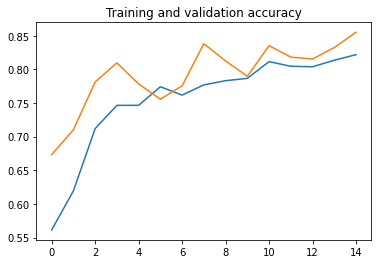

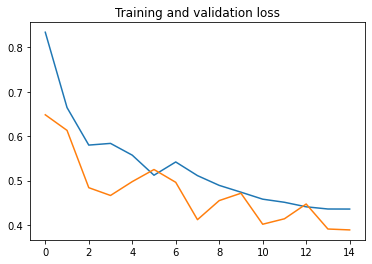

In [93]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )


As you can see we got accuracy as high as ~87% on the validation set and accuracy as high as ~81% percent on the training set. It got bettter each epoch and our accuracy would of been higher with more epoch.

## Bibliography
Brownlee, Jason "A Gentle Introduction to the Rectified Linear Unit (ReLU)" *Machine Learning Mastery*, https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/. Accessed 13 Apr 2022.

TensorFlow "Data Augmentation" *TensorFlow*, https://www.tensorflow.org/tutorials/images/data_augmentation. Accessed 14 Apr 2022.